In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

from xgboost import XGBClassifier



In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

In [8]:
df=pd.read_csv('Bank Customer Churn Predictioncsv2.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [10]:
df.drop(columns='customer_id', inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
x=df.drop(columns='churn',axis=1).copy()
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y=df['churn'].copy()
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [14]:
x_en=pd.get_dummies(x,columns=['country','gender'])
x_en.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [15]:
sum(y)/len(y)

0.2037

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_en,y,random_state=42,stratify=y)

In [17]:
sum(y_train)/len(y_train)

0.20373333333333332

In [18]:
sum(y_test)/len(y_test)

0.2036

In [19]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing=0, seed=42)


clf_xgb.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(x_test, y_test)])

[0]	validation_0-aucpr:0.68717
[1]	validation_0-aucpr:0.70575
[2]	validation_0-aucpr:0.71413
[3]	validation_0-aucpr:0.71772
[4]	validation_0-aucpr:0.71789
[5]	validation_0-aucpr:0.71828
[6]	validation_0-aucpr:0.72181
[7]	validation_0-aucpr:0.72167
[8]	validation_0-aucpr:0.72225
[9]	validation_0-aucpr:0.72296
[10]	validation_0-aucpr:0.72395
[11]	validation_0-aucpr:0.72519
[12]	validation_0-aucpr:0.72472
[13]	validation_0-aucpr:0.72253
[14]	validation_0-aucpr:0.72179
[15]	validation_0-aucpr:0.72170
[16]	validation_0-aucpr:0.71961
[17]	validation_0-aucpr:0.71888
[18]	validation_0-aucpr:0.72065
[19]	validation_0-aucpr:0.72123
[20]	validation_0-aucpr:0.71971
[21]	validation_0-aucpr:0.71903


C:\Users\jugaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\jugaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

[0 0 0 ... 1 0 0]

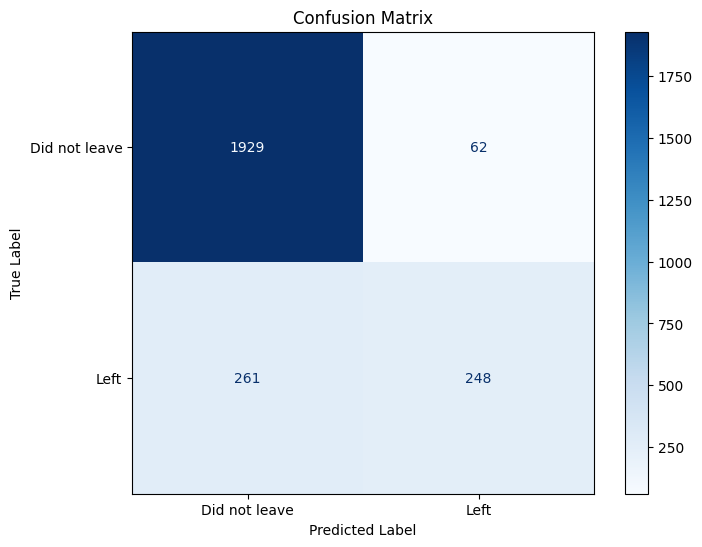

In [20]:
y_pred = clf_xgb.predict(x_test)
print(y_pred)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
display_labels = ['Did not leave', 'Left']

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')

# Add title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()


In [21]:
param_grid={
    'max_depth':[3,4,5,12],
    'learning_rate':[0.1,0.01,0.05,1],
    'gamma':[0,0.005,0.05,0.1,0.25,0.5,1,2],
    'reg_lambda':[5,10,15],
    'scale_pos_weight':[3,4,5]
}

In [22]:
optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.8,
                                colsample_bytree=0.6),
                            param_grid = param_grid,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs = 10,
                            cv = 3
)

optimal_params.fit(x_train,
                   y_train,
                   early_stopping_rounds = 10,
                   eval_metric ='auc',
                   eval_set=[(x_test,y_test)],
                   verbose=False)

print(optimal_params.best_params_)

                   

C:\Users\jugaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\jugaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 5, 'scale_pos_weight': 4}


In [23]:
param_grid={
    'max_depth':[4],
    'learning_rate':[0.5,0.1,0.05],
    'gamma':[1],
    'reg_lambda':[5,10],
    'scale_pos_weight':[4]
}

In [24]:
optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
                            param_grid = param_grid,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs = 10,
                            cv = 3
)

optimal_params.fit(x_train,
                   y_train,
                   early_stopping_rounds = 10,
                   eval_metric ='auc',
                   eval_set=[(x_test,y_test)],
                   verbose=False)

print(optimal_params.best_params_)

{'gamma': 1, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 4}


C:\Users\jugaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\jugaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [25]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective = 'binary:logistic',
                            gamma=1,
                            learning_rate=0.5,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=4,
                            subsample =0.9,
                            colsample_bytree=0.5)
clf_xgb.fit(x_train,
                   y_train,
                   verbose=True,
                   early_stopping_rounds = 10,
                   eval_metric ='aucpr',
                   eval_set=[(x_test,y_test)],
                   )



[0]	validation_0-aucpr:0.48986
[1]	validation_0-aucpr:0.67461
[2]	validation_0-aucpr:0.66671
[3]	validation_0-aucpr:0.68415
[4]	validation_0-aucpr:0.69759
[5]	validation_0-aucpr:0.69414
[6]	validation_0-aucpr:0.69041
[7]	validation_0-aucpr:0.68935
[8]	validation_0-aucpr:0.68975
[9]	validation_0-aucpr:0.68886
[10]	validation_0-aucpr:0.68775
[11]	validation_0-aucpr:0.69002
[12]	validation_0-aucpr:0.70215
[13]	validation_0-aucpr:0.70709
[14]	validation_0-aucpr:0.70298
[15]	validation_0-aucpr:0.70158
[16]	validation_0-aucpr:0.70398
[17]	validation_0-aucpr:0.70233
[18]	validation_0-aucpr:0.70168
[19]	validation_0-aucpr:0.70494
[20]	validation_0-aucpr:0.70585
[21]	validation_0-aucpr:0.70509
[22]	validation_0-aucpr:0.70811
[23]	validation_0-aucpr:0.70682
[24]	validation_0-aucpr:0.70611
[25]	validation_0-aucpr:0.71009
[26]	validation_0-aucpr:0.71926
[27]	validation_0-aucpr:0.71801
[28]	validation_0-aucpr:0.71524
[29]	validation_0-aucpr:0.71298
[30]	validation_0-aucpr:0.71419
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

[0 0 0 ... 1 0 0]


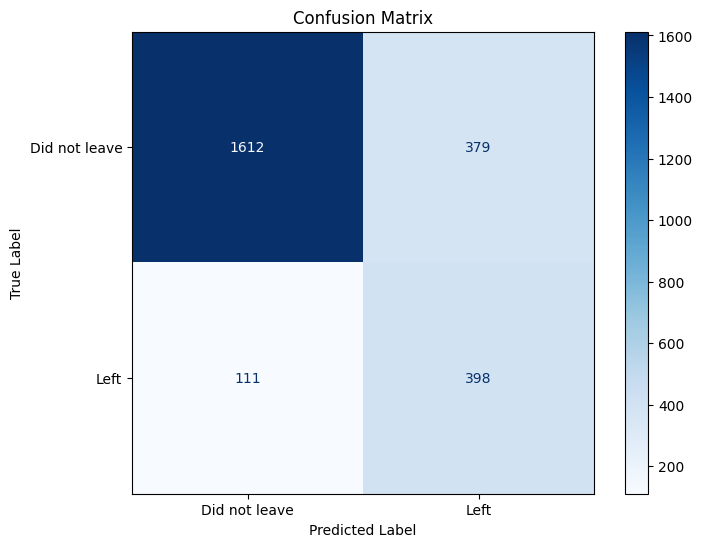

In [26]:
y_pred = clf_xgb.predict(x_test)
print(y_pred)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
display_labels = ['Did not leave', 'Left']

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')

# Add title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()